In [1]:
import pandas as pd
data=pd.read_csv('news_datasets.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Data Preprocessing Phase:

In [2]:
data.shape

(6335, 4)

In [3]:
#Isolating 20 Entries for Manual Testing in the end
data_manual_testing = data.iloc[6315:]
data=data.loc[:6314]


In [4]:
data_manual_testing.head()


,Unnamed: 0,title,text,label
6315,3717,Police Arrest Suspect In Charleston Church Sho...,"Police in Charleston, S.C., say a man they sus...",REAL
6316,5205,Donald Trump’s collapse was caused by one big ...,Silver of FiveThirtyEight.com has laid out fou...,REAL
6317,6696,FINA suspends Russian swimmer for 8 years over...,This post was originally published on this sit...,FAKE
6318,7991,BREAKING : Hillary Campaign Manager Deletes hi...,BREAKING : Hillary Campaign Manager Deletes hi...,FAKE
6319,1303,Why Ted Cruz Has the Most to Lose in New Hamps...,Ted Cruz took first prize in the Iowa caucuses...,REAL


In [5]:
print('New Shape',data.shape)

New Shape (6315, 4)


In [6]:
data = data.drop(columns=["Unnamed: 0"])

In [7]:
data.describe()

,title,text,label
count,6315,6315,6315
unique,6237,6041,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3162


In [8]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [9]:
data.duplicated().sum()

29

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(6286, 3)

Text Cleaning

In [12]:
import re
import string

def wordopt(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove non-word characters (excluding spaces)
    text = re.sub(r"\\W", " ", text)
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)
    
    # Remove punctuation (including hyphens)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove newline characters
    text = re.sub(r'\n', '', text)
    
    # Remove words containing digits
    text = re.sub(r'\w*\d\w*', '', text)
    
    return text


In [13]:
data['text']=data['text'].apply(wordopt)

In [14]:
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fellow...,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,us secretary of state john f kerry said monday...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november the lesson...,FAKE
4,The Battle of New York: Why This Primary Matters,its primary day in new york and frontrunners h...,REAL


In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SuperElectro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# printing the stopwords in English
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [18]:
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,us secretary state john f kerry said monday st...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november lesson tonig...,FAKE
4,The Battle of New York: Why This Primary Matters,primary day new york frontrunners hillary clin...,REAL


Data Visualisation

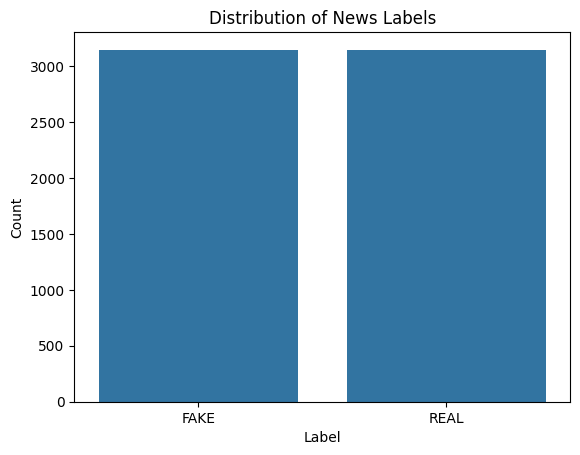

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# How many fake and real articles?
sns.countplot(x='label', data=data )

plt.title('Distribution of News Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

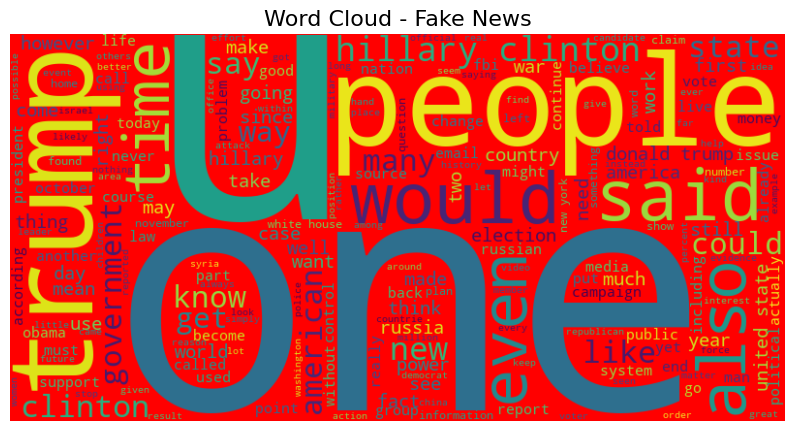

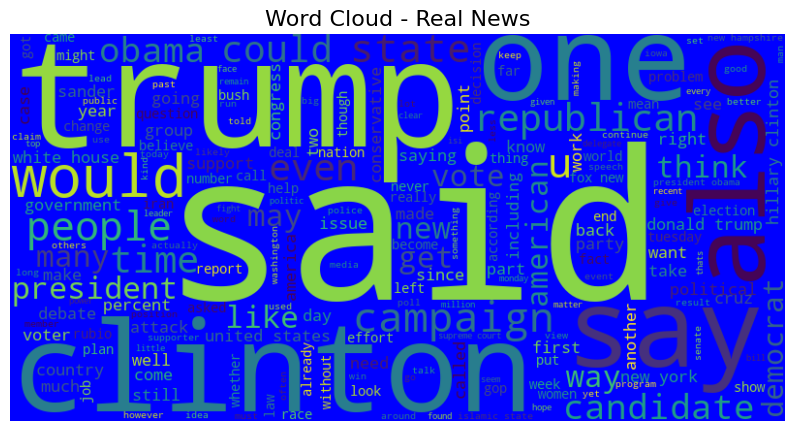

MemoryError: 

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Ajoutez des mots à ignorer dans le word cloud

# Fonction pour générer un word cloud
def generate_wordcloud(text, title, color="black"):
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color=color, 
        stopwords=stop, 
        max_words=200, 
        colormap="viridis"
    ).generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Créez des word clouds pour chaque catégorie
fake_text = ' '.join(data[data['label'] == 'FAKE']['text'])
real_text = ' '.join(data[data['label'] == 'REAL']['text'])

# Word Cloud pour les FAKE news
generate_wordcloud(fake_text, "Word Cloud - Fake News", color="red")

# Word Cloud pour les REAL news
generate_wordcloud(real_text, "Word Cloud - Real News", color="blue")

# Word Cloud global
all_text = ' '.join(data['text'])
generate_wordcloud(all_text, "Word Cloud - All News", color="white")


Feature Engineering

In [21]:
from sklearn.preprocessing import LabelEncoder
# Encode labels (FAKE -> 0, REAL -> 1)
label_encoder = LabelEncoder()
data["label"] = label_encoder.fit_transform(data["label"])

In [22]:
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,us secretary state john f kerry said monday st...,1
3,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november lesson tonig...,0
4,The Battle of New York: Why This Primary Matters,primary day new york frontrunners hillary clin...,1


In [23]:
# converting the textual data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
X = data["text"]
y = data["label"]
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [24]:
print(X)

  (0, 149)	0.026622329723650806
  (0, 438)	0.03055780012982184
  (0, 703)	0.020406887710155343
  (0, 709)	0.05510429126143607
  (0, 860)	0.06568080122298345
  (0, 1409)	0.029569048516717152
  (0, 1466)	0.02586258776418902
  (0, 1798)	0.0760637738182726
  (0, 1999)	0.020931035124902696
  (0, 2026)	0.01988034873832037
  (0, 2076)	0.04616363639009855
  (0, 2153)	0.015186679193692567
  (0, 2320)	0.018720556235878632
  (0, 2959)	0.026042911638280746
  (0, 3052)	0.024543952758416008
  (0, 3119)	0.03933851798267383
  (0, 3189)	0.01931289885231226
  (0, 3431)	0.02782979712590157
  (0, 3478)	0.017431558916958263
  (0, 3733)	0.023081818195049276
  (0, 3835)	0.014054027340879217
  (0, 4590)	0.024192521120485637
  (0, 5123)	0.025070892448133885
  (0, 5208)	0.039492681259981594
  (0, 5289)	0.02396174381511429
  :	:
  (6285, 91740)	0.04618848053093702
  (6285, 92974)	0.04939896869094243
  (6285, 95110)	0.05549521558335218
  (6285, 95144)	0.06101785075234652
  (6285, 96304)	0.06397604192372651
  (628

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
X_train.shape

(5028, 115708)

In [27]:
X_test.shape

(1258, 115708)

LogisticRegression :

In [28]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
train_y_pred = LR.predict(X_train)
print("train accurracy :",accuracy_score(train_y_pred,y_train))

train accurracy : 0.9592283214001591


In [29]:
LR.score(X_test, y_test)

0.9228934817170111

In [51]:
test_y_pred = LR.predict(X_test)
print("train accurracy :",accuracy_score(test_y_pred,y_test))

train accurracy : 0.9228934817170111


RandomForest :

In [31]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [52]:
train_y_pred = RF.predict(X_train)
print("train accurracy :",accuracy_score(train_y_pred,y_train))

train accurracy : 1.0


In [53]:
RF.score(X_test, y_test)

0.9117647058823529

Test et Validation 

In [49]:
# prediction system

input_data = X_test[20]
prediction = LR.predict(input_data)
if prediction[0] == 1:
    print('Fake news')
else:
    print('Real news')

Real news


In [34]:
data['text'][20]

'little fanfare fall new york developer planned build islamic community center north world trade center announced would instead use site tower luxury condosthose rallied opposition building religious affiliation back exultant “the importance defeat ground zero mosque cannot overstated” pamela geller president american freedom defense initiative wrote website breitbart september “the ground zero mosque became watershed issue effort raise awareness ultimately halt roll back advance islamic law islamic supremacism america”it’s well good many republicans condemned donald trump’s reprehensible call “a total complete shutdown muslims entering united states” house speaker paul ryan wis particularly forceful calling proper attention “many muslims serving armed forces dying country”when president george w bush honorably put lid rightwing islamophobia regularly praised american muslims stressed united states needed muslim allies fight violent extremism bush gone restraint side politics fell away

In [43]:
# Prediction system
input_data = data_manual_testing['text']
input_data_transformed = vectorizer.transform(input_data)  # Transformation des données d'entrée
prediction = LR.predict(input_data_transformed)

# Affichage des résultats
for i, pred in enumerate(prediction):
    print(f"Article {i+1}: {'Fake news' if pred == 0 else 'Real news'}")

from sklearn.metrics import classification_report
print (classification_report(y_test, test_y_pred ))

Article 1: Real news
Article 2: Fake news
Article 3: Fake news
Article 4: Fake news
Article 5: Real news
Article 6: Fake news
Article 7: Fake news
Article 8: Fake news
Article 9: Real news
Article 10: Real news
Article 11: Fake news
Article 12: Fake news
Article 13: Fake news
Article 14: Fake news
Article 15: Fake news
Article 16: Real news
Article 17: Fake news
Article 18: Fake news
Article 19: Real news
Article 20: Real news
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       649
           1       0.94      0.90      0.92       609

    accuracy                           0.92      1258
   macro avg       0.92      0.92      0.92      1258
weighted avg       0.92      0.92      0.92      1258



In [55]:
# Prediction system
input_data = data_manual_testing['text']
input_data_transformed = vectorizer.transform(input_data)  # Transformation des données d'entrée
prediction = RF.predict(input_data_transformed)

# Affichage des résultats
for i, pred in enumerate(prediction):
    print(f"Article {i+1}: {'Fake news' if pred == 0 else 'Real news'}")

from sklearn.metrics import classification_report
print (classification_report(y_test, test_y_pred ))

Article 1: Real news
Article 2: Real news
Article 3: Fake news
Article 4: Fake news
Article 5: Real news
Article 6: Fake news
Article 7: Real news
Article 8: Fake news
Article 9: Real news
Article 10: Real news
Article 11: Fake news
Article 12: Fake news
Article 13: Real news
Article 14: Fake news
Article 15: Fake news
Article 16: Real news
Article 17: Fake news
Article 18: Fake news
Article 19: Real news
Article 20: Real news
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       649
           1       0.94      0.90      0.92       609

    accuracy                           0.92      1258
   macro avg       0.92      0.92      0.92      1258
weighted avg       0.92      0.92      0.92      1258



In [37]:
#Pour la Comparaison 
data_manual_testing.head(20)

,Unnamed: 0,title,text,label
6315,3717,Police Arrest Suspect In Charleston Church Sho...,"Police in Charleston, S.C., say a man they sus...",REAL
6316,5205,Donald Trump’s collapse was caused by one big ...,Silver of FiveThirtyEight.com has laid out fou...,REAL
6317,6696,FINA suspends Russian swimmer for 8 years over...,This post was originally published on this sit...,FAKE
6318,7991,BREAKING : Hillary Campaign Manager Deletes hi...,BREAKING : Hillary Campaign Manager Deletes hi...,FAKE
6319,1303,Why Ted Cruz Has the Most to Lose in New Hamps...,Ted Cruz took first prize in the Iowa caucuses...,REAL
6320,9051,“Nothing Good Can Come of This Election”–and T...,"Posted on November 4, 2016 by Charles Hugh Smi...",FAKE
6321,10200,List of Republicans opposing Trump | OffGuardian,"Charlie Baker , Massachusetts (2015–present)[3...",FAKE
6322,10009,Putin: Use of 'mythical' Russian military thre...,"vladimir putin , Valdai , sochi , RBTH Daily R...",FAKE
6323,4214,Bernie Sanders says private meeting with Pope ...,ROME — U.S. Democratic presidential candidate...,REAL
6324,2316,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL


Confusion Matrix

Text(95.72222222222221, 0.5, 'Truth')

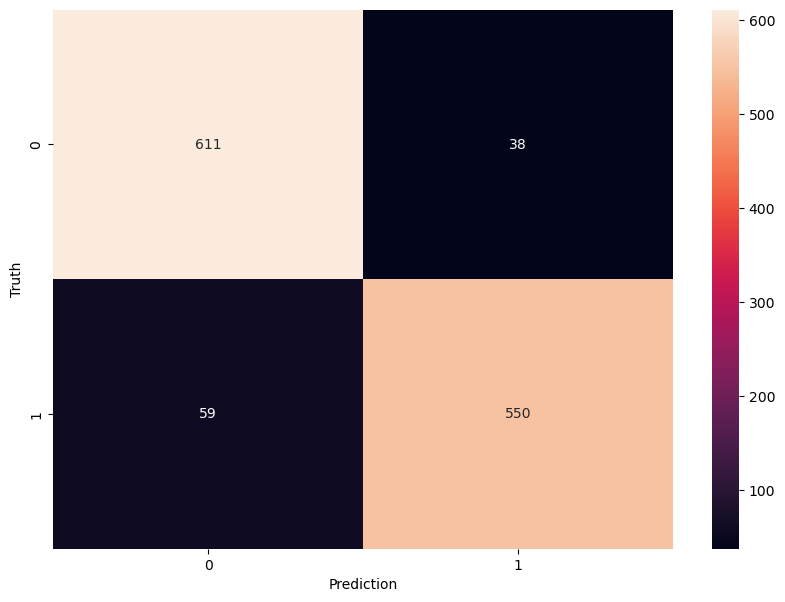

In [54]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')